# Practice Test

## 1.  Train KNN on breast cancer data set
1.  Here's a link to the breast cancer data set on UCI data repository.  [breast cancer data](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Prognostic%29)
1.  Data inspection check data for missing values.  
-Make a decision about whether to discard rows with missing data or to try and fill in the missing values.  
Hint:  If you decide to fill in the missing values, the easiest method is to replace missing values is to substitute the average of the non-missing values
2.  Set up data for training, validation and testing.  
-You'll use n-fold cross validation to determine k in k nearest neighbors.  Hold out 20% of the data for final testing.  
Pseudo code looks something like:
3.  Produce plots of absolute value of error for each of the n validation folds as a function of complexity (number of training examples minus k).  Also plot the root mean squared error.  Put all of these plots on the same graph.  
4.  Choose the best value of k for KNN and generate error on the test set to confirm your validation results. 

Here are some examples of what a training and validation error curves look like: [some train/validation plot examples](https://www.google.com/search?q=train+and+test+error+plot+images&biw=1580&bih=864&tbm=isch&imgil=Y7yivsIwgm2AXM%253A%253B8QRxV4RA1cfQ1M%253Bhttp%25253A%25252F%25252Fgenomicsclass.github.io%25252Fbook%25252Fpages%25252Fmachine_learning.html&source=iu&pf=m&fir=Y7yivsIwgm2AXM%253A%252C8QRxV4RA1cfQ1M%252C_&usg=__IkOEpQtI4rjyBaGTQqOOhAKvA4E%3D&ved=0ahUKEwiI9cS4o5fQAhWo0FQKHcT1DxgQyjcINA&ei=N8ggWMj9H6ih0wLE67_AAQ#imgrc=Pz8e50_l-ZGWrM%3A)

Note:  With KNN and with elastic net (described below), you'll treat the breast cancer problem as a regression problem.  That is train your model to predict the real number labels (2 and 4).  Measure and report performance in real number terms (sample standard deviation of error, for example).  We'll talk about approaches to dealing with classification error in the next lecture. 

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy
/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


0.184019027967 min RMSE for validation
0.305887645161 Min RMSE for test

[17] Best k value
0.354999159956  RMSE for Test final
0.86969308399 R^2 for test data
------------------------------------------

171 total number of samples
70 True Positives for threshold = 2.1
8 False Positives for threshold = 2.1
93 True Negatives for threshold = 2.1
0.0 False Negatives for threshold = 2.1
Total Cost 16163.0  Given FP = 2000 and FN = 200000

171 total number of samples
70 True Positives for threshold = 2.3000000000000003
5 False Positives for threshold = 2.3000000000000003
96 True Negatives for threshold = 2.3000000000000003
0.0 False Negatives for threshold = 2.3000000000000003
Total Cost 10166.0  Given FP = 2000 and FN = 200000

171 total number of samples
67 True Positives for threshold = 2.5
4 False Positives for threshold = 2.5
97 True Negatives for threshold = 2.5
3 False Negatives for threshold = 2.5
Total Cost 608164  Given FP = 2000 and FN = 200000

171 total number of samples
67 True

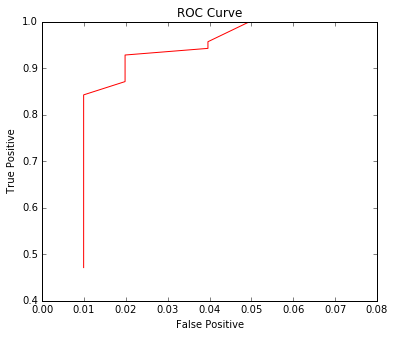

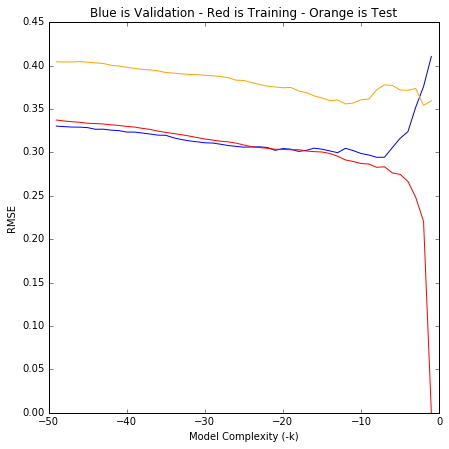

In [39]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from math import sqrt
import matplotlib.pyplot as plt
%pylab inline

h = ['sample_code_number','clump_thickness','uniformity_of_cell_size','uniformity_of_cell_shape',\
          'marginal_adhesion','single_epithelial_cell_use','bare_nuclei','bland_chromatin','normal_nuceoli','mitosis',\
         'class']
breast_cancer = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data',\
                           names=h)
breast_cancer_dropped = breast_cancer[breast_cancer.bare_nuclei.str.contains('\?')==False]


x = breast_cancer_dropped.values[:,0:(breast_cancer_dropped.values.shape[1]-1)].astype(int)


y = breast_cancer_dropped.values[:,-1].astype(int)

#scale the data here

scale = StandardScaler()

x = scale.fit_transform(x)


xTrVal, xTe, yTrVal, yTe = train_test_split(x, y)  #Function for splitting off data for final test
nFolds = 5  #number of cross validation folds

rmse_train = {}
rmse_val = {}
rmse_test = {}


#cross validation loop  

#Cost function

    
    
for k in range(1,50):
    #create the model
    KNNmodel = KNeighborsRegressor(k)
    
    for ixVal in range(nFolds):
        valIdx = np.array([i for i in range(len(xTrVal)) if i%nFolds==ixVal])  #or use sklearn k-fold package
        trainIdx = np.array([i for i in range(len(xTrVal)) if i%nFolds!=ixVal])
        xTrain = xTrVal[trainIdx]  #this will work if xTrVal is a numpy array.. if xTrVal is a list, use list comprehension
        xVal = xTrVal[valIdx]
        yTrain = yTrVal[trainIdx]
        yVal = yTrVal[valIdx]

        #fit to our data
        KNNmodel.fit(xTrain,yTrain) #train
        #calculate RMSE
        rmse_t = np.linalg.norm((yTrain-KNNmodel.predict(xTrain)), 2)/sqrt(len(yTrain)) #train
        rmse_v = np.linalg.norm((yVal-KNNmodel.predict(xVal)), 2)/sqrt(len(yVal)) #validation
        
        rmse_te = np.linalg.norm((yTe-KNNmodel.predict(xTe)), 2)/sqrt(len(yTe)) #test
        
    #append RMSE to keep track of it per k
        if k not in rmse_train:

            rmse_train[k]=[rmse_t]
            rmse_val[k]=[rmse_v]
            rmse_test[k]=[rmse_te]
            r_2_test.append(KNNmodel.score(xTe,yTe))
        else:

            rmse_train[k].append(rmse_t)
            rmse_val[k].append(rmse_v)
            rmse_test[k].append(rmse_te)



    #Use sklearn KNN package to provide training and validation results for range of reasonable k-values
    #save training and testing results for each of the nFolds runs
    
    

    
    

#Plot all nFolds RMSE (root mean squared error) plots as function of k
#pick k for minimum validation error 
min_rmse_validation = min([min(i) for i in rmse_val.values()])
print(min_rmse_validation,'min RMSE for validation')

min_rmse_test = min([min(i) for i in rmse_test.values()])
print(min_rmse_test,'Min RMSE for test')
print()


print([k for k,v in rmse_val.items() if min_rmse_validation in v], "Best k value")
best_k = [k for k,v in rmse_val.items() if min_rmse_validation in v][0]
#run xTe, yTe with best k value to confirm error estimate.

#Optimal K
final_KNNmodel = KNeighborsRegressor(best_k)
final_KNNmodel.fit(xTrVal,yTrVal)

#Final model
final_labels = yTe
final_predictions = final_KNNmodel.predict(xTe)

print(np.linalg.norm(yTe -final_KNNmodel.predict(xTe))/sqrt(len(yTe)),' RMSE for Test final')
#R^2 value

print(final_KNNmodel.score(xTe,yTe),'R^2 for test data')

print('------------------------------------------')
#Cost function
#Assign a cost function and compute the cost
cost_of_fn = 200000
cost_of_fp = 2000

#Generate ROC curves



true_positive = []
false_positive = []
#Generate ROC curves
#Positive case = cancer = label = 4


#threshold for ROC curve
for t in np.linspace(2.1,3.9,10):
    tp = sum([1 for (l,p) in list(zip(final_labels,final_predictions)) if p>t and l>3]) # good
    
    fn = sum([1 for (l,p) in list(zip(final_labels,final_predictions)) if p<=t and l>3]) #good
    
    fp = sum([1 for (l,p) in list(zip(final_labels,final_predictions)) if p>t and l<3]) # good
    
    tn = sum([1 for (l,p) in list(zip(final_labels,final_predictions)) if p<=t and l<3]) # good


    #print(tp,fp,tn,fn)
    #print(sum([fp,fn*10]),' Total cost for threshold = {}'.format(t))
    true_positive.append(float(tp/(sum(final_labels>3)))) ## >1 is positive for scaled data
    false_positive.append(float(fp/(sum(final_labels<3)))) # < 0 is negative for scaled data
    
    print()
    print(len(final_labels),'total number of samples')
    print(tp, 'True Positives for threshold = {}'.format(t))
    print(fp, 'False Positives for threshold = {}'.format(t))
    print(tn, 'True Negatives for threshold = {}'.format(t))
    print(fn ,'False Negatives for threshold = {}'.format(t))
    #Final cost function
    print('Total Cost',sum([tp,fp*cost_of_fp,tn,fn*cost_of_fn]),' Given FP = {} and FN = {}'.format(cost_of_fp,cost_of_fn))



plt.figure(figsize=(6,5))
plt.plot(sorted(false_positive,reverse = False),sorted(true_positive,reverse=False),color='red')
plt.xlabel('False Positive')
plt.ylabel(' True Positive')
plt.title('ROC Curve')

#plt.plot(sorted(false_positive,reverse = False))

#plt.plot(sorted([t for t in np.linspace(-2,2,10)],reverse = False),sorted(false_negative, reverse = False),color='blue')
# plt.title('true positive = red ,False negative = blue')
# plt.xlabel('Threshold value')


#################






print()


plt.figure(figsize=(7,7))
plt.plot([-k for k in rmse_val.keys()],[mean(k) for k in rmse_val.values()],color='b') #reverse k for complexity
plt.plot([-k for k in rmse_train.keys()],[mean(k) for k in rmse_train.values()],color='r') #reverse k for complexity
plt.plot([-k for k in rmse_test.keys()],[mean(k) for k in rmse_test.values()],color='orange')
plt.title('Blue is Validation - Red is Training - Orange is Test')
plt.xlabel('Model Complexity (-k)')
plt.ylabel("RMSE");


    

0.25059647028163695

# From the data above,  the the optimal k for the validation set is k=2,3,4 depending on the split.

##  2.  Train ElasticNet on breast cancer data set

1.  Use same train test split as above
2.  Use ElasticNetCV to perform cross-validation on xTrVal, yTrVal
3.  Plot the RMS error that ElasticNetCV produces
4.  Extract optimum coefficients and run on test data to confirm performance numbers.  

/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, Deprecation

0.163683988812  Best alpha
0.01 Best Lambda
0.407341818457 Lowest RMSE
0.42242421277 RMSE of the final model with parameters above
0.829658232493  R^2 for final model


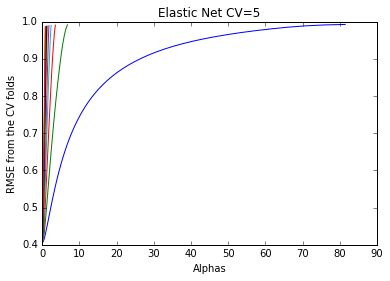

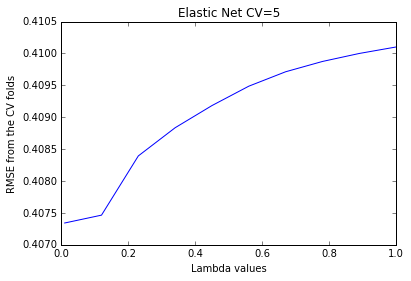

In [41]:
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import ElasticNet

h = ['sample_code_number','clump_thickness','uniformity_of_cell_size','uniformity_of_cell_shape',\
          'marginal_adhesion','single_epithelial_cell_use','bare_nuclei','bland_chromatin','normal_nuceoli','mitosis',\
         'class']
breast_cancer = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data',\
                           names=h)
breast_cancer_dropped = breast_cancer[breast_cancer.bare_nuclei.str.contains('\?')==False]


x = breast_cancer_dropped.values[:,0:(breast_cancer_dropped.values.shape[1]-1)].astype(int)


y = breast_cancer_dropped.values[:,-1].astype(int)

#scale the data here

scale = StandardScaler()

x = scale.fit_transform(x)
y = scale.fit_transform(y)

#train test split

xTrVal, xTe, yTrVal, yTe = train_test_split(x, y)  #Function for splitting off data for final test

#RMSE
alphas = []
RMSEs = []
lambdas = []

for i in linspace(.01,1,10):
    eNetModel = ElasticNetCV(l1_ratio=i, normalize=False, cv=5, verbose=0, random_state=None, selection='cyclic')

    eNetModel.fit(xTrVal,yTrVal)  # fit on training data
   
    alphas.append(eNetModel.alpha_)

    xvalError = np.sqrt(np.mean(eNetModel.mse_path_, axis=1))
    RMSEs.append(min(xvalError)) #
    
    
    #Different lambda values (between ridge and lasso)
    lambdas.append(i)
    

    plt.plot(eNetModel.alphas_,xvalError)
    plt.title('Elastic Net CV=5')
    plt.ylabel('RMSE from the CV folds')
    plt.xlabel('Alphas')
 

    



print(alphas[np.argmin(RMSEs)],' Best alpha')
print(lambdas[np.argmin(RMSEs)],'Best Lambda')
print(min(RMSEs),'Lowest RMSE')
plt.figure()
plt.plot(lambdas,RMSEs)
plt.title('Elastic Net CV=5')
plt.xlabel('Lambda values')
plt.ylabel('RMSE from the CV folds')

#Build the final model on the holdout data
best_alpha = alphas[np.argmin(RMSEs)]
best_lambda = lambdas[np.argmin(RMSEs)]

final_eNet = ElasticNet(l1_ratio=best_lambda, alpha=best_alpha, normalize=False, random_state=None, selection='cyclic')
final_eNet.fit(xTrVal,yTrVal)
print(np.linalg.norm(yTe-final_eNet.predict(xTe))/sqrt(len(yTe)), 'RMSE of the final model with parameters above')
print(final_eNet.score(xTe,yTe), ' R^2 for final model')

# The best lambda and alpha, which might change if you re-run the cells above, are ~.008 for alpha and .12 for lambda which produces a RMSE of ~.38.

>Depending on the cells above, generally KNN (regression) has performed better than elastic net.